 # КЕЙС-3
# Определение уязвимых групп населения

# Задачи проекта: #

### 1. Кластеризовать регионы России и определить, какие из них наиболее остро нуждаются в помощи бедным/неблагополучным слоям населения;
### 2. Описать группы населения, сталкивающиеся с бедностью; 
### 3. Выяснить: влияет ли на уровень бедности в регионе число детей, пенсионеров и других социаль-уязвимых групп;
### 4. Выяснить: связаны ли уровень бедности/социального неблагополучия с производством и потреблением в регионе;
### 5. Выяснить: какие еще зависимости можно пронаблюдать относительно социально незащищенных слоев населения. ### 

# Целью проекта является проверка следующих гипотез: 

### 1. "По идее, группы населения, сталкивающиеся с бедностью, должны иметь низкий показатель по доходам населения, ВВП, и жилищным условиям. Соответственно показатели процента людей, живущих за чертой бедности, людей с различными заболеваемостями будут выше."  Это мы должны проверить в рамках 2 задачи.  

### 2. "Кажется, что уровень бедности влияет на число детей, пенсионеров и других социаль-уязвимых групп в регионе. Чем хуже условия в регионе, тем меньше детей и пенсионеров, тем меньше доход" Это мы должны узнать в рамках 3 задачи. 

### 3. "Предположительно, что уровень бедности/социального неблагополучия связан с производством и потреблением в регионе" Это мы должны проверить в рамках 4 задачи.

# Описание данных #
### Проектный анализ будет проводиться на данных, представленных заказчиком ###
  * **Численность населения** (population) 
  * **Среднедушевые доходы населения** (income)
  * **ВВП** (gdpp) 
  * **Процент людей, живущих за чертой бедности** (per_poverty) 
  * **Число умерших на первом году жизни детей в городской местности** (child_mort) 
  * **Число умерших на первом году жизни детей в сельской местности** (child_mort_rural) 
  * **Число людей с инвалидностью по регионам** (disabled)
  * **Жилищные условия** (housing)
  * **Малоимущие дети** (poverty_children)
  * **Малоимущие трудящиеся** (poverty_workable)
  * **Малоимущие пенсионеры** (poverty_old)
  * **Количество случаев заболевания органов дыхания** (respiratory)
  * **Количество случаев обнаружения новообразований** (neoplasm)
  * **Оборот розничной торговли на душу населения** (retail)
  * **Расходы на социальную политику от общих расходов бюджета региона** (welfare)

Данные были взять за недавние 5 лет (2016-2020гг)

*Для начала **импортируем нужные библиотеки**.*  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly
import plotly.express as px

In [2]:
import folium
import json

In [3]:
m = folium.Map(location=[63.391522, 96.328125], zoom_start=3)

**Получаем и преобразуем данные**. 

In [4]:
#Численность населения по регионам за 2016-2020гг/кол-во человек

#данные этого датасета преобразовали, удалив ненужные года
population= pd.read_excel('population.xlsx')

#удаляем округи, федерации и районы - они нам не нужны для анализа
fd = population[population['Регион'].str.contains('федеральный округ|Федерация|район|Раздел')].index
population.drop(fd, axis = 0, inplace=True)

#преобразовываем название области в индекс
population["Регион"] = population["Регион"].str.strip()
population.set_index('Регион', inplace=True)
population.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,2376774,2365680,2350080,2332813,2317153
Амурская область,805689,801752,798424,793194,790044
Архангельская область,1174078,1165750,1155028,1144119,1136535
Астраханская область,1018626,1018866,1017514,1014065,1005782
Белгородская область,1550137,1552865,1549876,1547418,1549151


In [5]:
#ищем среднее значение за 5 лет, получаем новый итоговый датасет с численностью населения
population=population.mean(axis=1)
population.head()

Регион
Алтайский край           2348500.0
Амурская область          797820.6
Архангельская область    1155102.0
Астраханская область     1014970.6
Белгородская область     1549889.4
dtype: float64

In [6]:
population=population/1000

*Продолжаем **преобразовывание данных для анализа**. Проделываем те же действия, что были выше.*

In [7]:
#Среднедушевые доходы населения в рублях за 2015-2020гг
income = pd.read_excel('cash.xlsx')
fd = income [income ['субъект'].str.contains('федеральный округ|Федерация|район')].index
income.drop(fd, axis = 0, inplace=True)
income.rename(columns={'субъект':"Регион"}, inplace=True)
income["Регион"] = income["Регион"].str.strip()
income.set_index('Регион', inplace=True)
income.head(5)

,2015,2016,2017,2018,2019,2020
Регион,,,,,,
Алтайский край,20860,21256,22139,22829,23937,23864
Амурская область,28240,27976,29213,30937,33304,35499
Архангельская область,31285,31394,32310,33831,35693,36779
Архангельская область без\nавтономного округа,29716,29837,30707,32054,33874,34852
Астраханская область,23832,22841,22884,23670,24971,25199


In [8]:
income  = income .loc[:,[2016, 2017, 2018, 2019, 2020]].mean(axis=1)
income.head()

Регион
Алтайский край                                   22805.0
Амурская область                                 31385.8
Архангельская область                            34001.4
Архангельская область без\nавтономного округа    32264.8
Астраханская область                             23913.0
dtype: float64

In [9]:
#Валовой региональный продукт на душу населения в рублях за 1996-2020гг.
gdpp = pd.read_excel('gross.xlsx')
fd = gdpp [gdpp ['территория'].str.contains('федеральный округ|Федерация|район')].index
gdpp.drop(fd, axis = 0, inplace=True)
gdpp.rename(columns={'территория':"Регион"}, inplace=True)
gdpp["Регион"] = gdpp["Регион"].str.strip()
gdpp.set_index('Регион', inplace=True)
gdpp.head() 

,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,7605.8,7431.0,8012.4,12204.8,17660.5,23509.0,27991.2,34295.8,44934.9,53812.4,...,137677.2,153556.7,173763.5,186798.6,204933.1,224525.8,231268.4,247599.3,271319.7,291156.9
Амурская область,13155.7,15818.0,15103.7,21935.4,28317.2,42578.3,50449.6,59480.3,72937.0,88597.1,...,273175.8,280023.9,258817.0,286282.6,343385.7,370192.4,373935.1,419905.2,521060.1,571362.1
Архангельская область,12218.6,14133.4,15755.3,25622.9,44797.4,49474.0,61989.4,78507.0,109045.7,128965.3,...,360165.9,391146.2,417776.4,456985.8,532533.7,609484.0,654268.9,753081.9,780623.9,697648.2
Архангельская область (кроме Ненецкого автономного округа),NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,232540.7,270662.9,283264.5,310817.4,352837.9,400764.6,441961.6,493205.1,509917.0,514200.4
Астраханская область,7643.9,8559.6,10172.2,15805.2,27815.3,32037.2,40786.8,50386.3,56357.5,69814.0,...,170504.7,206677.1,269821.7,290822.2,315996.9,361704.8,434701.5,570206.4,596388.2,526950.9


In [10]:
gdpp = gdpp.loc[:,[2016, 2017, 2018, 2019, 2020]].mean(axis=1)
gdpp.head()

Регион
Алтайский край                                                253174.02
Амурская область                                              451290.98
Архангельская область                                         699021.38
Архангельская область (кроме Ненецкого автономного округа)    472009.74
Астраханская область                                          497990.36
dtype: float64

In [11]:
#Процент людей, живущих за чертой бедности за 1995-2020гг.
per_poverty= pd.read_excel('poverty.xlsx')
fd = per_poverty[per_poverty['region'].str.contains('федеральный округ|Федерация|район')].index
per_poverty.drop(fd, axis = 0, inplace=True)
per_poverty.rename(columns={'region':"Регион"}, inplace=True)
per_poverty["Регион"] = per_poverty["Регион"].str.strip()
per_poverty.set_index('Регион', inplace=True)
per_poverty.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Регион,,,,,,,,,,,,,,,,,,,,,
Алтайский край,33.7,46.8,45.7,52.9,53.8,53.9,47.3,38.9,33.9,30.9,...,22.6,20.6,17.6,17.1,18.0,17.8,17.5,17.4,17.6,17.5
Амурская область,36.1,28.2,26.3,31.2,38.0,47.7,45.3,44.6,35.6,33.8,...,20.4,16.0,16.2,14.8,15.2,17.0,16.7,15.6,15.7,15.2
Архангельская область,26.2,26.8,23.9,31.6,42.6,33.5,27.4,26.5,23.5,19.6,...,14.4,13.2,14.6,14.8,16.5,15.2,14.3,13.5,13.6,12.8
Астраханская область,32.3,30.7,25.0,30.4,36.0,33.4,31.1,26.2,22.9,20.3,...,14.2,12.5,11.8,12.0,14.2,16.1,15.5,15.1,15.5,15.6
Белгородская область,19.9,17.6,18.9,20.1,24.2,33.6,29.1,25.4,22.9,20.7,...,8.6,6.5,7.6,7.7,8.5,8.1,7.8,7.5,7.8,7.2


In [12]:
per_poverty = per_poverty.loc[:,'2016':'2020'].mean(axis=1)
per_poverty.head()

Регион
Алтайский край           17.56
Амурская область         16.04
Архангельская область    13.88
Астраханская область     15.56
Белгородская область      7.68
dtype: float64

In [13]:
#Число умерших на первом году жизни детей за год в городской местности за 2016-2020гг.
child_mort= pd.read_excel('child_mort_urban.xlsx')
fd = child_mort[child_mort['территория'].str.contains('федеральный округ|Федерация|район')].index
child_mort.drop(fd, axis = 0, inplace=True)
child_mort.rename(columns={'территория':"Регион"}, inplace=True)
child_mort["Регион"] = child_mort["Регион"].str.strip()
child_mort.set_index('Регион', inplace=True)
child_mort.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,124.0,106.0,106.0,54.0,53.0
Амурская область,30.0,28.0,29.0,27.0,29.0
Архангельская область,63.0,54.0,39.0,43.0,26.0
Астраханская область,61.0,52.0,57.0,54.0,51.0
Белгородская область,72.0,43.0,40.0,23.0,25.0


In [14]:
child_mort=child_mort.mean(axis=1)
child_mort.head()

Регион
Алтайский край           88.6
Амурская область         28.6
Архангельская область    45.0
Астраханская область     55.0
Белгородская область     40.6
dtype: float64

In [15]:
#Число умерших на первом году жизни детей за год в сельской местности за 2016-2020гг.
child_mort_rural= pd.read_excel('child_mort_rural.xlsx')
fd = child_mort_rural[child_mort_rural['территория'].str.contains('федеральный округ|Федерация|район')].index
child_mort_rural.drop(fd, axis = 0, inplace=True)
child_mort_rural.rename(columns={'территория':"Регион"}, inplace=True)
child_mort_rural["Регион"] = child_mort_rural["Регион"].str.strip()
child_mort_rural.set_index('Регион', inplace=True)
child_mort_rural = child_mort_rural.drop_duplicates()
child_mort_rural.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,87.0,79.0,70.0,60.0,44.0
Амурская область,23.0,20.0,17.0,16.0,13.0
Архангельская область,18.0,22.0,15.0,16.0,7.0
Архангельская область (кроме Ненецкого автономного округа),17.0,22.0,14.0,16.0,5.0
Астраханская область,21.0,22.0,14.0,18.0,13.0


In [16]:
child_mort_rural=child_mort_rural.mean(axis=1)
child_mort_rural.head()

Регион
Алтайский край                                                68.0
Амурская область                                              17.8
Архангельская область                                         15.6
Архангельская область (кроме Ненецкого автономного округа)    14.8
Астраханская область                                          17.6
dtype: float64

In [17]:
#Число людей с инвалидностью по регионам (всего, на конец года) за 2017-2020
disabled= pd.read_excel('disabled_total.xlsx')
fd = disabled[disabled['region'].str.contains('федеральный округ|Федерация|район')].index
disabled.drop(fd, axis = 0, inplace=True)
disabled.rename(columns={'region':"Регион"}, inplace=True)
disabled["Регион"] = disabled["Регион"].str.strip()
disabled.set_index('Регион', inplace=True)
disabled.head()

,2017,2018,2019,2020
Регион,,,,
Алтайский край,178967,175193,173868,168269
Амурская область,67214,65679,64684,62621
Архангельская область,87456,85929,85345,83461
Астраханская область,44196,43356,43544,42970
Белгородская область,215173,206624,200166,192554


In [18]:
disabled=disabled.mean(axis=1)
round(disabled.head(),2)

Регион
Алтайский край           174074.25
Амурская область          65049.50
Архангельская область     85547.75
Астраханская область      43516.50
Белгородская область     203629.25
dtype: float64

In [19]:
#Жилищные условия (столбец с общей площадью в расчете на члена домохозяйства) в кв.м за 2020г.
housing= pd.read_excel('housing_2020.xlsx')
fd = housing[housing['Регион'].str.contains('федеральный округ|Федерация|район')].index
housing.drop(fd, axis = 0, inplace=True)
housing["Регион"] = housing["Регион"].str.strip()
housing.set_index('Регион', inplace=True)
housing.head()

,Размер общей площади в расчете на члена домохозяйства
Регион,
Алтайский край,25.9
Амурская область,23.2
Архангельская область без авт. округа,24.6
Астраханская область,24.9
Белгородская область,25.1


In [20]:
housing=housing.mean(axis=1)
round(housing.head(),2)

Регион
Алтайский край                           25.9
Амурская область                         23.2
Архангельская область без авт. округа    24.6
Астраханская область                     24.9
Белгородская область                     25.1
dtype: float64

In [21]:
#Процент малоимущих детей за 2017-2020гг.
poverty_children= pd.read_excel('poverty_socdem_children.xlsx')
fd = poverty_children[poverty_children['регион'].str.contains('федеральный округ|Федерация|район')].index
poverty_children.drop(fd, axis = 0, inplace=True)
poverty_children.rename(columns={'регион':"Регион"}, inplace=True)
poverty_children["Регион"] = poverty_children["Регион"].str.strip()
poverty_children.set_index('Регион', inplace=True)
#poverty_children = poverty_children.drop_duplicates()
poverty_children.head()

,2017,2018,2019,2020
Регион,,,,
Алтайский край,38.0,42.1,38.7,31.4
Амурская область,39.9,40.6,33.9,38.4
Архангельская область,38.1,39.5,33.0,30.2
Архангельская область (кроме Ненецкого автономного округа),37.4,38.8,31.3,28.5
Астраханская область,40.2,35.0,43.4,42.1


In [22]:
poverty_children=poverty_children.mean(axis=1)
round(poverty_children.head(),2)

Регион
Алтайский край                                                37.55
Амурская область                                              38.20
Архангельская область                                         35.20
Архангельская область (кроме Ненецкого автономного округа)    34.00
Астраханская область                                          40.17
dtype: float64

In [23]:
#Процент малоимущего работоспособного населения за 2017-2020гг.
poverty_workable= pd.read_excel('poverty_socdem_workable.xlsx')
fd = poverty_workable[poverty_workable['регион'].str.contains('федеральный округ|Федерация|район')].index
poverty_workable.drop(fd, axis = 0, inplace=True)
poverty_workable.rename(columns={'регион':"Регион"}, inplace=True)
poverty_workable["Регион"] = poverty_workable["Регион"].str.strip()
poverty_workable.set_index('Регион', inplace=True)
#poverty_workable = poverty_workable.drop_duplicates()
poverty_workable.head()

,2017,2018,2019,2020
Регион,,,,
Алтайский край,55.6,52.8,57.4,59.4
Амурская область,54.1,54.8,58.9,56.9
Архангельская область,55.1,54.0,59.0,63.1
Астраханская область,55.5,59.8,51.9,52.4
Белгородская область,44.8,42.3,0.0,NaN


In [24]:
poverty_workable=poverty_workable.mean(axis=1)
round(poverty_workable.head(),2)

Регион
Алтайский край           56.30
Амурская область         56.18
Архангельская область    57.80
Астраханская область     54.90
Белгородская область     29.03
dtype: float64

In [25]:
#Процент малоимущих пенсионеров за 2017-2020гг.
poverty_old= pd.read_excel('poverty_socdem_old.xlsx')
fd = poverty_old[poverty_old['регион'].str.contains('федеральный округ|Федерация|район')].index
poverty_old.drop(fd, axis = 0, inplace=True)
poverty_old.rename(columns={'регион':"Регион"}, inplace=True)
poverty_old["Регион"] = poverty_old["Регион"].str.strip()
poverty_old.set_index('Регион', inplace=True)
#poverty_old = poverty_old.drop_duplicates()
poverty_old.head()

,2017,2018,2019,2020
Регион,,,,
Алтайский край,6.4,5.1,3.9,9.2
Амурская область,6.0,4.6,7.2,4.7
Архангельская область,6.8,6.5,8.1,6.7
Архангельская область (без АО),7.1,6.6,8.9,7.2
Астраханская область,4.2,5.2,4.7,5.5


In [26]:
poverty_old=poverty_old.mean(axis=1)
round(poverty_old.head(),2)

Регион
Алтайский край                    6.15
Амурская область                  5.62
Архангельская область             7.02
Архангельская область (без АО)    7.45
Астраханская область              4.90
dtype: float64

In [27]:
#Количество случаев (на 1тыс человек) заболевания органов дыхания за 2016-2020гг. 
respiratory= pd.read_excel('respiratory_diseases.xlsx')
fd = respiratory[respiratory['Регион'].str.contains('федеральный округ|Федерация|район')].index
respiratory.drop(fd, axis = 0, inplace=True)
respiratory["Регион"] = respiratory["Регион"].str.strip()
respiratory.set_index('Регион', inplace=True)
respiratory=respiratory.drop_duplicates() 
respiratory.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,35.625,38.479,48.489,42.961,57.302
Амурская область,30.066,29.156,28.982,26.776,30.788
Архангельская область,79.456,77.859,72.881,54.760,88.587
Архангельская область (без АО),77.415,76.284,72.306,54.373,88.038
Астраханская область,47.203,41.617,45.742,39.946,49.989


In [28]:
respiratory=respiratory.mean(axis=1)
respiratory.head()

Регион
Алтайский край                    44.5712
Амурская область                  29.1536
Архангельская область             74.7086
Архангельская область (без АО)    73.6832
Астраханская область              44.8994
dtype: float64

In [29]:
#Количество случаев (на 1тыс человек) обнаружения новообразований за 2016-2020гг. 
neoplasms= pd.read_excel('neoplasms.xlsx')
fd = neoplasms[neoplasms['Регион'].str.contains('федеральный округ|Федерация|район')].index
neoplasms.drop(fd, axis = 0, inplace=True)
neoplasms["Регион"] = neoplasms["Регион"].str.strip()
neoplasms.set_index('Регион', inplace=True)
neoplasms.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,17.768,15.096,13.992,15.855,10.293
Амурская область,3.940,4.199,3.652,2.446,3.568
Архангельская область,18.928,15.279,14.851,9.918,16.234
Астраханская область,6.683,6.763,5.945,6.736,5.059
Белгородская область,4.450,4.320,6.673,6.410,7.618


In [30]:
neoplasms=neoplasms.mean(axis=1)
neoplasms.head()

Регион
Алтайский край           14.6008
Амурская область          3.5610
Архангельская область    15.0420
Астраханская область      6.2372
Белгородская область      5.8942
dtype: float64

In [31]:
#Оборот годовой розничной торговли на душу населения за 2016-2020гг. в рублях
retail= pd.read_excel('retail.xlsx')
fd = retail[retail['субъект'].str.contains('федеральный округ|Федерация|район')].index
retail.drop(fd, axis = 0, inplace=True)
retail.rename(columns={'субъект':"Регион"}, inplace=True)
retail["Регион"] = retail["Регион"].str.strip()
retail.set_index('Регион', inplace=True)
retail.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,137844,143873,150444,159514,153605
Амурская область,191523,202038,214688,231113,245233
Архангельская область,203019,217241,229576,239516,249101
Архангельская область (кроме Ненецкого автономного округа),202977,217332,229922,240155,250033
Астраханская область,164241,163829,170710,179153,174527


In [32]:
retail=retail.mean(axis=1)
retail.head()

Регион
Алтайский край                                                149056.0
Амурская область                                              216919.0
Архангельская область                                         227690.6
Архангельская область (кроме Ненецкого автономного округа)    228083.8
Астраханская область                                          170492.0
dtype: float64

In [33]:
#Объем отгруженных товаров собственного производства, по основным видам деятельности в млн.р.
#В ходе обработки датасета, были обнаружены пробелы, которые в дальнейшем заполнила данными от 2013-2016гг
regional_production= pd.read_excel('regional_production.xlsx')
fd = regional_production[regional_production['Регион'].str.contains('федеральный округ|Федерация|район')].index
regional_production.drop(fd, axis = 0, inplace=True)
regional_production["Регион"] = regional_production["Регион"].str.strip()
regional_production.set_index('Регион', inplace=True)
regional_production.head()

,2017,2018,2019,2020
Регион,,,,
Алтайский край,367988.19590,385596.37218,419158.97480,426221.67510
Амурская область,134422.07380,134380.41810,170013.34270,202288.23350
Архангельская область,648107.65800,673813.27570,632307.00070,595009.15389
Астраханская область,313284.86919,441883.26900,450757.34220,362298.87790
Белгородская область,783325.73800,895434.12931,939036.36767,974146.90930


In [34]:
#Получаются слишком большие значения, поэтому переводим данные в млрд
regional_production=regional_production.mean(axis=1)
round(regional_production/1000,2)

Регион
Алтайский край                     399.74
Амурская область                   160.28
Архангельская область              637.31
Астраханская область               392.06
Белгородская область               897.99
                                   ...   
Челябинская область               1697.67
Чеченская Республика                36.80
Чувашская Республика - Чувашия     237.65
Чукотский автономный округ          93.75
Ярославская область                442.58
Length: 82, dtype: float64

In [35]:
#Процент расходов на социальную политику от общих расходов бюджета региона(в год) за 2016-2020гг.
welfare= pd.read_excel('welfare.xlsx')
fd = welfare[welfare['Регион'].str.contains('федеральный округ|Федерация|район')].index
welfare.drop(fd, axis = 0, inplace=True)
welfare["Регион"] = welfare["Регион"].str.strip()
welfare.set_index('Регион', inplace=True)
welfare.head()

,2016,2017,2018,2019,2020
Регион,,,,,
Алтайский край,20.4,30.9,29.8,28.3,29.7
Амурская область,28.9,26.3,24.1,22.7,21.7
Архангельская область,16.3,24.8,24.2,22.4,21.4
Астраханская область,20.5,27.7,26.4,25.8,31.4
Белгородская область,11.8,16.4,15.6,13.8,16.1


In [36]:
welfare=welfare.mean(axis=1)
welfare.head()

Регион
Алтайский край           27.82
Амурская область         24.74
Архангельская область    21.82
Астраханская область     26.36
Белгородская область     14.74
dtype: float64

#### Подготовка данных **завершена**.  Переходим к следующему этапу - **создание единого датафрейма** с 14 признаками. 

In [37]:
#объединяем все 14 датафреймов в единую таблицу "result"
result = pd.concat([income, 
                    gdpp,
                    per_poverty,
                    housing, 
                    child_mort, 
                    child_mort_rural, 
                    poverty_children, 
                    poverty_workable,
                    poverty_old,
                    respiratory,
                    neoplasms, 
                    welfare,
                    population,
                    retail
                   ], 
            axis=1).rename(columns={0:'income', 
                    1:'gdpp',
                    2:'poverty',
                    3:'housing', 
                    4:'child_mort_urban',                            
                    5:'child_mort_rural', 
                    6:'poverty_children', 
                    7:'poverty_workable', 
                    8:'poverty_old',  
                    9:'respiratory',
                    10:'neoplasms', 
                    11:'welfare',
                    12:'population',
                    13:'retail'
                                   })
result.head()

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Алтайский край,22805.0,253174.02,17.56,25.9,88.6,68.0,37.550,56.300,6.150,44.5712,14.6008,27.82,2348.5000,149056.0
Амурская область,31385.8,451290.98,16.04,23.2,28.6,17.8,38.200,56.175,5.625,29.1536,3.5610,24.74,797.8206,216919.0
Архангельская область,34001.4,699021.38,13.88,NaN,45.0,15.6,35.200,57.800,7.025,74.7086,15.0420,21.82,1155.1020,227690.6
Архангельская область без\nавтономного округа,32264.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Астраханская область,23913.0,497990.36,15.56,24.9,55.0,17.6,40.175,54.900,4.900,44.8994,6.2372,26.36,1014.9706,170492.0


In [38]:
#Убираем строки с пустыми данными и у нас должно получиться в итоге 66 регионов 
result.dropna(inplace=True)
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66 entries, Алтайский край to Ярославская область
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   income            66 non-null     float64
 1   gdpp              66 non-null     float64
 2   poverty           66 non-null     float64
 3   housing           66 non-null     float64
 4   child_mort_urban  66 non-null     float64
 5   child_mort_rural  66 non-null     float64
 6   poverty_children  66 non-null     float64
 7   poverty_workable  66 non-null     float64
 8   poverty_old       66 non-null     float64
 9   respiratory       66 non-null     float64
 10  neoplasms         66 non-null     float64
 11  welfare           66 non-null     float64
 12  population        66 non-null     float64
 13  retail            66 non-null     float64
dtypes: float64(14)
memory usage: 7.7+ KB


Посмотрим на **корреляцию** признаков. 

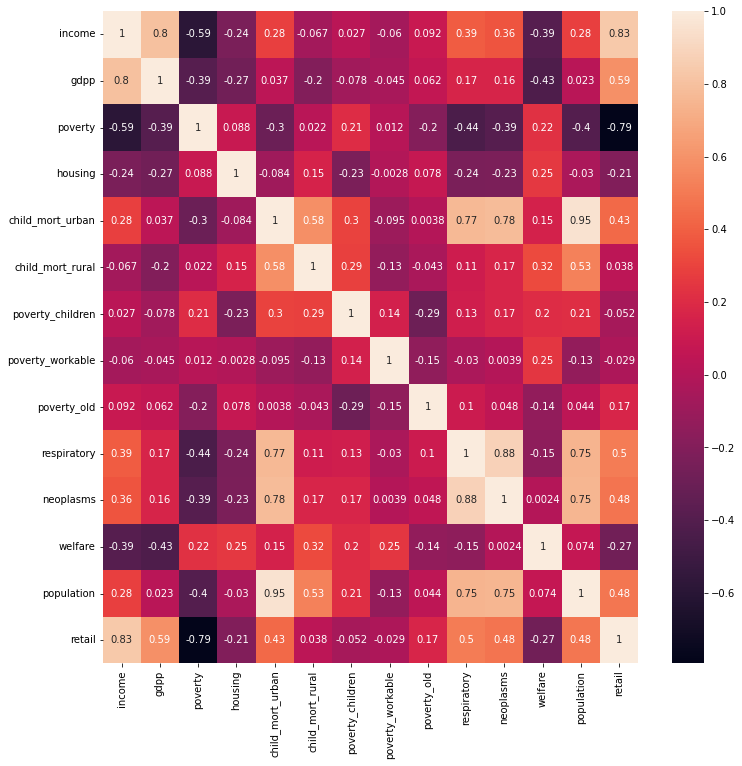

In [39]:
sns.heatmap(result.corr(), annot=True)
plt.gcf().set_size_inches(12,12)

**Доходы населения и ВВП** напрямую зависят друг от друга. ВВП растет - доходы тоже увеличиваются. Также видим, взаимосвязь между **процентом бедного населения и доходами** в отрицательном значении. Т.е. доходы увеличиваются - уменьшается процент людей, живущих за чертой бедности. Также видна зависимость между **процентом расходов на социальную политику и процентом работоспособного малоимущего населения**. А какого рода эта зависимость, разберемся немного позже. 

## Переходм к этапу КЛАСТЕРИЗАЦИИ ##

In [40]:
#Переводим абсолютные значения в относительные
result['child_mort_urban']=result['child_mort_urban']/result['population']
result['child_mort_rural']=result['child_mort_rural']/result['population']
result.head()

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Алтайский край,22805.0,253174.02,17.56,25.9,0.037726,0.028955,37.550,56.300000,6.150000,44.5712,14.6008,27.82,2348.5000,149056.0
Амурская область,31385.8,451290.98,16.04,23.2,0.035848,0.022311,38.200,56.175000,5.625000,29.1536,3.5610,24.74,797.8206,216919.0
Астраханская область,23913.0,497990.36,15.56,24.9,0.054189,0.017340,40.175,54.900000,4.900000,44.8994,6.2372,26.36,1014.9706,170492.0
Белгородская область,31222.4,578765.06,7.68,25.1,0.026195,0.018195,29.400,29.033333,8.233333,43.9612,5.8942,14.74,1549.8894,216128.2
Брянская область,26533.0,304715.44,13.92,30.5,0.036364,0.016860,41.375,54.775000,3.875000,32.5886,6.5470,23.76,1209.9862,206798.0


In [41]:
from sklearn.mixture import GaussianMixture

In [42]:
#с данным набором признаков у меня (технически) получилось 6-ть кластеров: 
gm_clustering = GaussianMixture(n_components=6, random_state=30)
gm_clustering.fit(result)
gm_prediction = gm_clustering.predict(result)
gm_prediction

array([0, 2, 2, 3, 5, 5, 5, 2, 2, 5, 0, 3, 2, 2, 4, 0, 5, 2, 4, 0, 2, 3,
       2, 3, 4, 2, 2, 2, 5, 2, 5, 5, 3, 3, 5, 0, 2, 0, 0, 0, 0, 2, 4, 0,
       0, 5, 0, 2, 5, 5, 2, 5, 1, 3, 5, 5, 5, 5, 3, 2, 2, 5, 3, 2, 0, 2],
      dtype=int64)

In [43]:
#Пишем функцию для визуализации в таблицах минимальных и максимальных значений по столбцу:
def highlight_min_max_in_row(row): 
    min_map = row == row.min() 
    max_map = row == row.max() 
    style_table = []
    for m in zip(min_map, max_map):
        tmp = 'background-color: rosybrown' if m[0] else ''
        tmp = 'background-color: darkcyan' if m[1] else tmp if len(tmp)>0 else ''
        style_table.append(tmp)
    return style_table 

### КЛАСТЕР №1 ###

In [44]:
gm_res = pd.Series(gm_prediction)
gm_res.index = result.index
cluster_1=result[gm_res==0]
#Подставляем функцию для визуализации. Красный - минимальное значение, Зеленый- максимальное значение
cluster_1.style.apply(highlight_min_max_in_row, axis=0)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Алтайский край,22805.000000,253174.020000,17.560000,25.900000,0.037726,0.028955,37.550000,56.300000,6.150000,44.571200,14.600800,27.820000,2348.500000,149056.000000
Ивановская область,25022.000000,232553.000000,14.360000,25.200000,0.032748,0.007497,37.300000,54.233333,8.466667,22.739800,3.433800,26.960000,1013.793800,163936.400000
Кировская область,22631.000000,276737.540000,15.020000,22.900000,0.030280,0.012487,38.075000,56.825000,5.050000,53.025200,6.519600,24.520000,1281.381400,151533.400000
Курганская область,20866.600000,262938.920000,19.580000,23.000000,0.034096,0.026992,39.525000,56.475000,4.025000,25.477600,7.024800,24.640000,844.681800,135557.000000
Республика Алтай,19590.600000,248337.860000,24.620000,19.500000,0.032131,0.112919,45.375000,50.700000,3.900000,1.894200,0.416600,17.420000,217.855600,120855.000000
Республика Бурятия,24604.800000,262675.580000,19.480000,22.700000,0.045730,0.041056,43.500000,51.575000,4.950000,35.422000,6.236200,22.060000,984.027800,183238.400000
Республика Дагестан,26595.200000,220953.600000,14.300000,29.900000,0.050723,0.082776,39.900000,53.550000,6.525000,26.626000,1.827400,27.540000,3063.685800,192674.600000
Республика Ингушетия,16238.800000,134501.460000,29.960000,38.200000,0.062558,0.055607,39.800000,50.925000,9.250000,1.378200,0.050000,27.600000,489.149400,49174.200000
Республика Калмыкия,17471.600000,305194.800000,24.160000,30.700000,0.019626,0.030529,27.025000,46.025000,1.950000,1.798400,0.065400,22.740000,275.146200,77126.400000


In [45]:
#посмотрим на статистические данные первого кластера: 
round(cluster_1.describe(),2)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
count,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00,13.00
mean,21264.25,236910.59,21.03,25.62,0.04,0.05,39.93,52.64,5.50,19.38,3.41,23.56,1143.86,128511.82
std,3320.51,47463.18,6.05,5.13,0.02,0.04,5.25,3.96,1.94,17.76,4.24,4.51,860.83,42398.15
min,16234.60,134501.46,14.30,18.80,0.02,0.01,27.02,46.03,1.95,1.38,0.05,13.16,217.86,49174.20
25%,19590.60,221798.32,17.56,22.90,0.03,0.03,37.55,50.70,4.40,1.89,0.29,21.92,489.15,115880.40
50%,20896.20,248337.86,19.58,24.60,0.03,0.03,39.80,51.58,5.05,22.74,1.83,24.52,984.03,132196.20
75%,23454.80,262938.92,24.16,27.50,0.05,0.08,43.88,56.30,6.52,26.63,6.24,27.54,1436.34,151533.40
max,26595.20,305194.80,34.76,38.20,0.08,0.11,46.02,59.65,9.25,53.03,14.60,28.48,3063.69,192674.60


In [46]:
#Посомтрим на средние значения данных в 1-м кластере:
cl_1=pd.DataFrame(cluster_1.mean(axis=0)).rename(columns={0:'cluster_1',})
round(cl_1,4)

,cluster_1
income,21264.2462
gdpp,236910.5923
poverty,21.0277
housing,25.6154
child_mort_urban,0.0422
child_mort_rural,0.0491
poverty_children,39.9269
poverty_workable,52.6449
poverty_old,5.5013
respiratory,19.3756


В **первый кластер** вошли 13 регионов со средним **доходом в 21 264р., процентом малоимущих - 21% и процентом социальной поддержки в 24%**

### КЛАСТЕР №2 ###

In [47]:
gm_res = pd.Series(gm_prediction)
gm_res.index = result.index
cluster_2=result[gm_res==1]
cluster_2

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Сахалинская область,54707.6,2029395.38,8.7,22.5,0.039301,0.010644,38.066667,54.3,7.6,19.3688,2.4522,14.26,488.5426,307109.8


Во **второй кластер** вошел один регион - **Сахалинская область**. С высоким показателем **дохода в 54 707р в месяц, низким процентом малоимущих - 8.7%. И с  очевидной низкой детской смертностью**

### КЛАСТЕР №3 ###

In [48]:
gm_res = pd.Series(gm_prediction)
gm_res.index = result.index
cluster_3=result[gm_res==2]
cluster_3.style.apply(highlight_min_max_in_row, axis=0)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Амурская область,31385.800000,451290.980000,16.040000,23.200000,0.035848,0.022311,38.200000,56.175000,5.625000,29.153600,3.561000,24.740000,797.820600,216919.000000
Астраханская область,23913.000000,497990.360000,15.560000,24.900000,0.054189,0.017340,40.175000,54.900000,4.900000,44.899400,6.237200,26.360000,1014.970600,170492.000000
Вологодская область,27472.000000,500144.700000,13.380000,22.900000,0.043054,0.021782,39.325000,55.075000,5.575000,33.073800,4.397800,25.380000,1175.278400,158822.800000
Воронежская область,30634.200000,405518.160000,8.940000,29.000000,0.033892,0.007122,36.225000,58.400000,5.400000,69.973400,8.023000,19.940000,2330.935800,234238.200000
Калининградская область,27611.400000,483216.280000,13.700000,23.100000,0.042438,0.006436,34.150000,56.425000,9.400000,204.878200,6.186200,9.860000,994.399600,169088.400000
Калужская область,30096.000000,491566.600000,10.120000,22.600000,0.039814,0.009310,37.800000,51.566667,10.633333,74.790400,17.557400,17.960000,1009.690600,195789.600000
Краснодарский край,34628.600000,439966.580000,10.720000,26.900000,0.028631,0.020848,40.875000,51.100000,8.025000,147.807800,23.227200,22.400000,5602.373200,244479.800000
Курская область,27535.400000,408373.540000,10.100000,24.400000,0.031602,0.017776,38.100000,54.875000,7.025000,59.168600,6.510200,21.960000,1113.839600,190239.600000
Липецкая область,30321.000000,491812.160000,8.740000,24.500000,0.025409,0.016011,39.450000,54.875000,5.700000,51.996000,3.352600,21.340000,1149.184200,220571.800000


In [49]:
#описательная статистика 
round(cluster_3.describe(),2)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
count,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00,21.00
mean,27952.62,455403.62,12.63,24.17,0.04,0.02,38.66,55.18,6.16,86.64,12.73,21.93,1902.34,190891.21
std,3149.48,31866.20,2.69,1.72,0.01,0.01,2.64,2.35,1.75,67.86,11.91,3.50,1351.18,27958.54
min,21594.60,403355.30,8.74,20.80,0.03,0.01,33.32,50.78,3.25,9.87,1.05,9.86,536.48,152320.60
25%,25721.00,432651.98,10.12,23.20,0.03,0.01,36.33,54.50,5.28,42.49,6.08,21.34,1009.69,169088.40
50%,27839.00,451290.98,12.94,23.60,0.04,0.02,39.33,55.08,5.62,63.73,8.02,22.26,1264.27,191475.80
75%,30096.00,484881.08,14.28,24.90,0.04,0.02,40.10,56.47,7.02,108.50,17.56,23.10,2784.44,215618.60
max,34628.60,500144.70,18.78,29.00,0.05,0.03,42.98,59.40,10.63,267.25,51.28,26.36,5602.37,244479.80


In [50]:
#Найдем реднее значение по третьему кластеру и преобразуем сразу в датасет:
cl_3=pd.DataFrame(cluster_3.mean(axis=0)).rename(columns={0:'cluster_3',})
round(cl_3,4)

,cluster_3
income,27952.6190
gdpp,455403.6229
poverty,12.6305
housing,24.1714
child_mort_urban,0.0380
child_mort_rural,0.0168
poverty_children,38.6619
poverty_workable,55.1817
poverty_old,6.1575
respiratory,86.6352


В третий кластер входят **21 региона со средним доходом в 27 953тыс. в месяц. Высоким процентом населения, который живет за чертой бедности - 13% и 22% социальной поддержки.** 

### КЛАСТЕР №4 ###

In [51]:
gm_res = pd.Series(gm_prediction)
gm_res.index = result.index
cluster_4=result[gm_res==3]
cluster_4.style.apply(highlight_min_max_in_row, axis=0)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Белгородская область,31222.400000,578765.060000,7.680000,25.100000,0.026195,0.018195,29.400000,29.033333,8.233333,43.961200,5.894200,14.740000,1549.889400,216128.200000
Иркутская область,24865.600000,576993.580000,18.220000,21.300000,0.058012,0.026550,39.475000,54.425000,6.075000,86.513800,15.982600,24.400000,2402.970400,146148.000000
Ленинградская область,30997.600000,607216.780000,8.920000,24.700000,0.021958,0.008344,16.833333,42.066667,7.800000,64.056800,3.320600,16.840000,1821.665600,222071.000000
Московская область,44515.000000,623044.400000,7.420000,22.300000,0.040255,0.004689,45.050000,47.275000,7.650000,359.414000,41.143600,19.060000,7507.202400,307147.800000
Пермский край,29120.000000,513885.020000,14.480000,22.700000,0.041299,0.016642,40.525000,54.275000,5.175000,115.672800,14.926800,22.400000,2619.937600,202117.000000
Приморский край,34468.000000,514011.280000,14.320000,22.400000,0.044752,0.017880,41.550000,52.900000,5.550000,172.372000,21.654400,22.080000,1912.749400,211644.000000
Свердловская область,36626.200000,549023.680000,9.480000,22.800000,0.046597,0.011614,42.825000,52.425000,4.700000,317.069800,43.116600,22.060000,4322.196600,258347.800000
Томская область,27479.200000,532268.760000,14.740000,25.700000,0.033577,0.018365,40.225000,55.300000,4.500000,96.807400,6.439200,21.220000,1078.129200,147371.400000
Хабаровский край,39189.200000,574156.620000,12.380000,23.300000,0.052161,0.007689,37.525000,54.475000,8.025000,82.584400,13.205600,21.980000,1326.652800,246843.000000


In [52]:
round(cluster_4.describe(),2)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
count,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00,9.00
mean,33164.80,563262.80,11.96,23.37,0.04,0.01,37.05,49.13,6.41,148.72,18.41,20.53,2726.82,217535.36
std,6172.85,38859.65,3.76,1.47,0.01,0.01,8.75,8.68,1.51,113.72,14.62,3.06,2032.84,51074.83
min,24865.60,513885.02,7.42,21.30,0.02,0.00,16.83,29.03,4.50,43.96,3.32,14.74,1078.13,146148.00
25%,29120.00,532268.76,8.92,22.40,0.03,0.01,37.52,47.28,5.18,82.58,6.44,19.06,1549.89,202117.00
50%,31222.40,574156.62,12.38,22.80,0.04,0.02,40.22,52.90,6.08,96.81,14.93,21.98,1912.75,216128.20
75%,36626.20,578765.06,14.48,24.70,0.05,0.02,41.55,54.42,7.80,172.37,21.65,22.08,2619.94,246843.00
max,44515.00,623044.40,18.22,25.70,0.06,0.03,45.05,55.30,8.23,359.41,43.12,24.40,7507.20,307147.80


In [53]:
round(cluster_4.mean(axis=0),2)

income               33164.80
gdpp                563262.80
poverty                 11.96
housing                 23.37
child_mort_urban         0.04
child_mort_rural         0.01
poverty_children        37.05
poverty_workable        49.13
poverty_old              6.41
respiratory            148.72
neoplasms               18.41
welfare                 20.53
population            2726.82
retail              217535.36
dtype: float64

### КЛАСТЕР №5 ###

In [54]:
gm_res = pd.Series(gm_prediction)
gm_res.index = result.index
cluster_5=result[gm_res==4]
cluster_5

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Камчатский край,49194.8,820668.14,15.96,23.9,0.059715,0.017787,41.550,55.45,3.000,2.3012,0.3794,14.16,314.8282,183505.6
Красноярский край,30258.0,807521.72,17.48,22.7,0.047010,0.022774,38.875,55.50,5.600,155.4358,28.2686,21.28,2871.7138,187646.4
Мурманская область,41757.6,768733.32,10.78,23.9,0.045179,0.001595,40.350,55.75,3.825,93.7290,12.4594,22.48,752.5622,225853.8
Республика Коми,34028.4,770613.30,15.50,21.9,0.036199,0.011670,38.150,54.60,7.275,42.2010,8.2022,21.70,839.7932,186367.6


### КЛАСТЕР №6 ###

In [55]:
gm_res = pd.Series(gm_prediction)
gm_res.index = result.index
cluster_6=result[gm_res==5]
cluster_6.style.apply(highlight_min_max_in_row, axis=0)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
Регион,,,,,,,,,,,,,,
Брянская область,26533.000000,304715.440000,13.920000,30.500000,0.036364,0.016860,41.375000,54.775000,3.875000,32.588600,6.547000,23.760000,1209.986200,206798.000000
Владимирская область,24147.600000,357923.420000,13.200000,24.200000,0.039191,0.013354,39.500000,53.266667,7.233333,26.872800,1.860800,22.960000,1377.865000,162836.200000
Волгоградская область,23058.200000,361840.400000,13.240000,25.600000,0.031188,0.014761,39.425000,54.300000,6.225000,86.204400,17.423600,24.940000,2520.192000,154123.800000
Забайкальский край,24316.400000,321327.440000,21.580000,23.100000,0.049624,0.030036,37.300000,54.850000,7.850000,39.120400,3.614400,24.140000,1072.057200,154301.000000
Костромская область,24409.600000,296258.700000,12.980000,21.700000,0.049789,0.021783,42.400000,52.150000,5.425000,67.743800,9.008800,20.100000,642.716600,161000.000000
Омская область,25834.400000,373958.500000,14.000000,23.400000,0.043447,0.028930,41.650000,52.825000,5.550000,103.318800,15.668600,27.160000,1956.417800,169617.800000
Орловская область,24957.400000,338581.280000,13.620000,29.200000,0.033202,0.019546,38.825000,54.425000,6.725000,19.211200,4.238600,24.220000,746.949800,176808.000000
Пензенская область,22176.600000,316003.900000,13.820000,23.400000,0.027688,0.013543,37.300000,53.250000,9.500000,77.192800,6.000000,21.940000,1329.110000,156378.800000
Псковская область,24231.400000,286322.820000,17.220000,23.000000,0.030495,0.020435,34.950000,57.925000,7.075000,14.823000,1.547600,21.960000,636.170000,178371.400000


In [56]:
round(cluster_6.describe(),2)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail
count,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00,18.00
mean,24446.38,331209.09,14.57,25.52,0.04,0.02,37.90,55.60,6.50,53.75,6.60,23.44,1521.97,169591.00
std,2266.18,29482.27,2.54,2.31,0.01,0.01,2.74,2.36,1.67,29.94,4.81,2.31,935.19,23569.09
min,19023.40,280167.94,10.46,21.70,0.02,0.01,33.37,52.15,3.88,14.82,1.55,19.48,636.17,115042.00
25%,23142.95,311641.86,13.21,23.48,0.03,0.01,35.11,54.33,5.46,31.44,3.39,21.62,968.11,154820.45
50%,24363.00,329498.72,13.87,25.65,0.03,0.01,38.15,54.92,6.48,50.42,4.60,23.95,1227.53,171530.30
75%,25797.45,357230.80,15.60,26.98,0.04,0.02,39.48,57.54,7.34,74.79,8.39,24.96,1811.78,178252.70
max,29134.00,373958.50,21.58,30.50,0.05,0.03,42.40,59.60,10.20,117.93,17.42,27.16,4217.59,218733.20


In [57]:
cl_6=pd.DataFrame(cluster_6.mean(axis=0)).rename(columns={0:'cluster_6',})
round(cl_6,4)

,cluster_6
income,24446.3778
gdpp,331209.0911
poverty,14.5700
housing,25.5222
child_mort_urban,0.0351
child_mort_rural,0.0180
poverty_children,37.9009
poverty_workable,55.5954
poverty_old,6.5032
respiratory,53.7533


В шестой кластер попало **18 региона. Со средним доходом 24 446р., 15% бедного населения и соцпомощью в 23%**

### Определяем кластер, наиболее остро нуждающийся в помощи бедным/неблагополучным слоям населения ###

In [58]:
#Объединяем датафреймы со средними значениями по кластерам. 2,4,5 кластер не берется, 
#т.к. там высокие показатели доходов населения  
total_clusters=pd.concat([cl_1, cl_3, cl_6], axis=1)
total_clusters.style.apply(highlight_min_max_in_row, axis=1)

,cluster_1,cluster_3,cluster_6
income,21264.246154,27952.619048,24446.377778
gdpp,236910.592308,455403.622857,331209.091111
poverty,21.027692,12.630476,14.570000
housing,25.615385,24.171429,25.522222
child_mort_urban,0.042217,0.038038,0.035061
child_mort_rural,0.049096,0.016821,0.018031
poverty_children,39.926923,38.661905,37.900926
poverty_workable,52.644872,55.181746,55.595370
poverty_old,5.501282,6.157540,6.503241
respiratory,19.375646,86.635181,53.753300


**Кластер №3** показывает не самые лучшие результаты. Из всех представленных групп, в третьем кластере самый **низкий показатель доходов населения и ВВП соответственно, самый высокий процент населения, живущего за чертой бедности и самый высокий показатель процента детских смертей при низком числе населения.** Для дальнейшего анализа выбираем 1-й кластер, как остро нуждающийся в помощи 

## Анализ и проверка гипотез ##

### Проверяем первую гипотезу: ###
    "По идее, группы населения, сталкивающиеся с бедностью, должны иметь низкий показатель по доходам населения, ВВП, и жилищным условиям. Соответственно показатели процента людей, живущих за чертой бедности, людей с различными заболеваемостями будут выше."

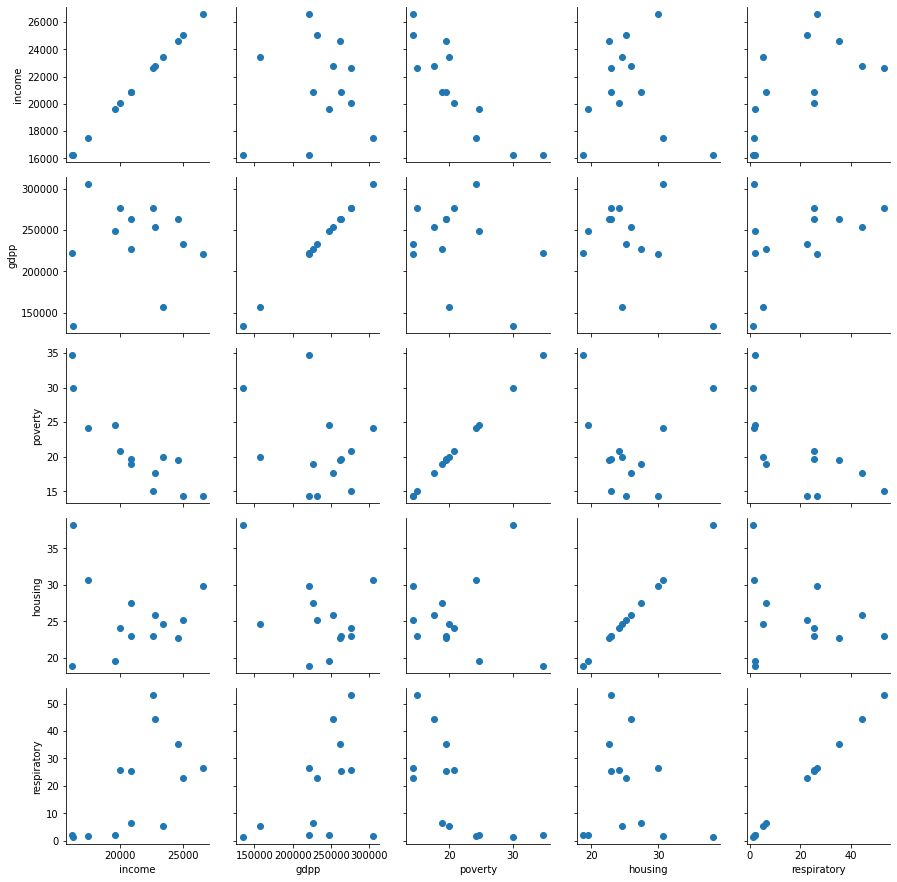

In [59]:
#Построим график зависимостей между следующими показателями:
mpg_mod = cluster_1[["income", "gdpp", "poverty", "housing", "respiratory"]]
pg = sns.PairGrid(mpg_mod)
pg.map(plt.scatter)

Ответственным за неблагополучность я выбрала признак **"Процент людей, живущих за чертой бедности" (poverty).** При **повышении данного показателя доходы и ВВП населения падают.** Также заметим, что данный показатель **никак не влияет на количество случаев заболевания органов дыхания и на жилищные условия.** Можно предположить, что жилищные  условия могут колебаться взависимости от вида жилья. К примеру, часть населения в данных регионах чаще проживает в частных секторах, цена которых за квадратный метр уступает цене за квартиру. 

**Резюмируем:** показатель неблагополучного положения региона никак не влияет на количество случаев респираторных заболеваний, как и на жилищные условия населения. 

In [ ]:
#P.s.Пробовали привести показатели заболеваемости к относительным (respiratory/population), 
#но визуализация дала понять, что показатель слишком маленький, тк процент заболеваемости держался на одном и том же
#уровне 

Попробуем проследить **корреляцию** между следующими показателями:

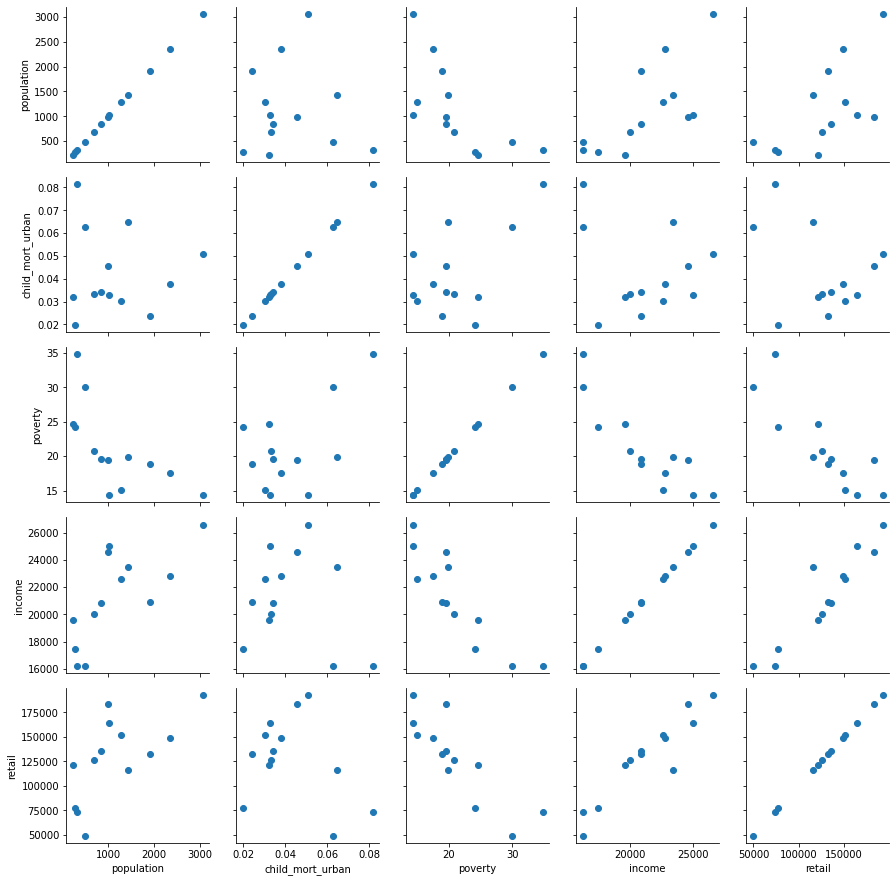

In [60]:
mpg_mod = cluster_1[["population", "child_mort_urban", "poverty", "income", "retail"]]
pg = sns.PairGrid(mpg_mod)
pg.map(plt.scatter)

Видим **зависимость** между показателями **процента детской смертности в городе и процентом малоимущих. Чем выше процент бедного населения, тем выше показатель детской смертности.** Также замечена еще одна интересная закономерность: **чем выше показатель розничной торговли, тем ниже процент детской смертности в городе.**

## Проверяем вторую гипотезу ##
"Кажется, что уровень бедности влияет на число детей, пенсионеров и других социаль-уязвимых групп в регионе. Чем хуже условия в регионе, тем меньше детей и пенсионеров, тем меньше доход" 

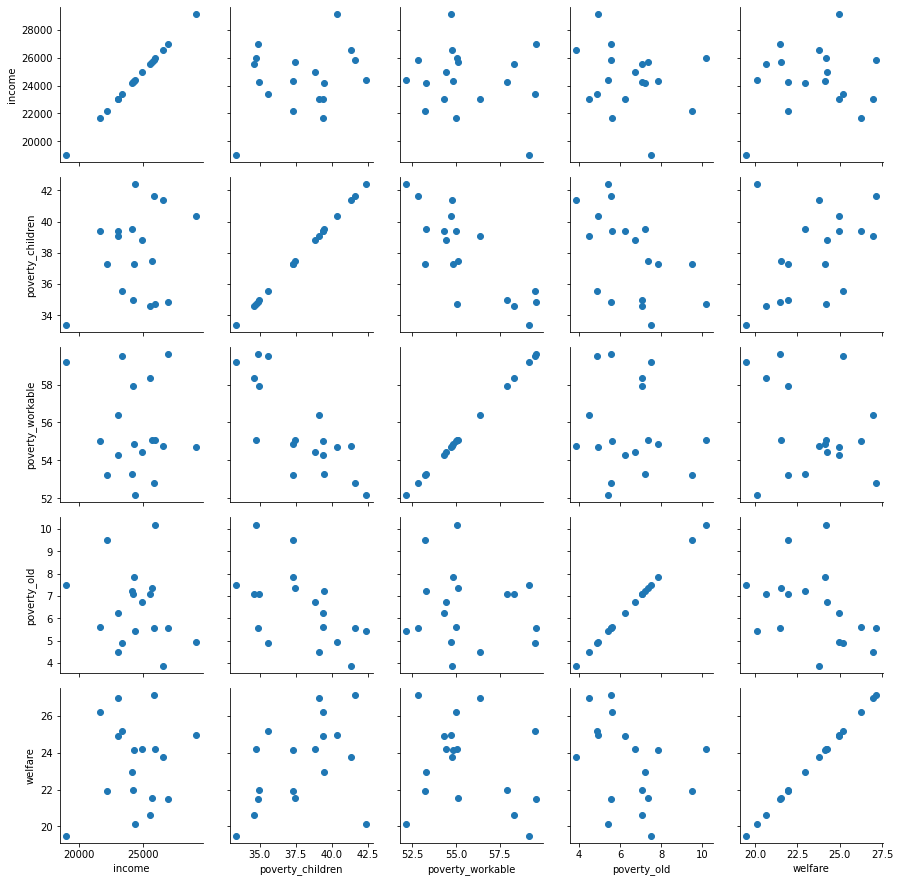

In [61]:
mpg_mod = cluster_6[["income", "poverty_children", "poverty_workable", "poverty_old", "welfare"]]
pg = sns.PairGrid(mpg_mod)
pg.map(plt.scatter)

Взаимосвязь между процентом неблагополучных детей, работоспособного и пенсионного возраста населения можно обусловить тем, что они взяты из одного датасета, финальный столбец которого является 100% всех этих показателей. А вот связь между социальной помощью и процентом неблагополучного населения пенсионного возраста можно заметить. **Чем выше соцпомощь, тем выше процент пенсионеров.**

**Резюмируем:** уровень бедности никак не влияет на число детей и пенсионеров.

## Проверяем третью гипотезу ##
"Предположительно, что уровень бедности/социального неблагополучия связан с производством и потреблением в регионе" 

In [62]:
#Тк производство регионального продукта не было добавлено в итоговую таблицу, 
#тк кластеризация производилась некорректно, добавляем этот датасет на данном этапе 
cluster_with_product= pd.concat([cluster_1, 
                    regional_production
                   ], 
            axis=1).rename(columns={0:'regional_production'})
cluster_with_product.dropna(inplace=True)
cluster_with_product.head(5)

,income,gdpp,poverty,housing,child_mort_urban,child_mort_rural,poverty_children,poverty_workable,poverty_old,respiratory,neoplasms,welfare,population,retail,regional_production
Регион,,,,,,,,,,,,,,,
Алтайский край,22805.0,253174.02,17.56,25.9,0.037726,0.028955,37.550,56.300000,6.150000,44.5712,14.6008,27.82,2348.5000,149056.0,399741.304495
Ивановская область,25022.0,232553.00,14.36,25.2,0.032748,0.007497,37.300,54.233333,8.466667,22.7398,3.4338,26.96,1013.7938,163936.4,193556.193400
Кировская область,22631.0,276737.54,15.02,22.9,0.030280,0.012487,38.075,56.825000,5.050000,53.0252,6.5196,24.52,1281.3814,151533.4,280855.762095
Курганская область,20866.6,262938.92,19.58,23.0,0.034096,0.026992,39.525,56.475000,4.025000,25.4776,7.0248,24.64,844.6818,135557.0,140343.818867
Республика Алтай,19590.6,248337.86,24.62,19.5,0.032131,0.112919,45.375,50.700000,3.900000,1.8942,0.4166,17.42,217.8556,120855.0,9556.709137


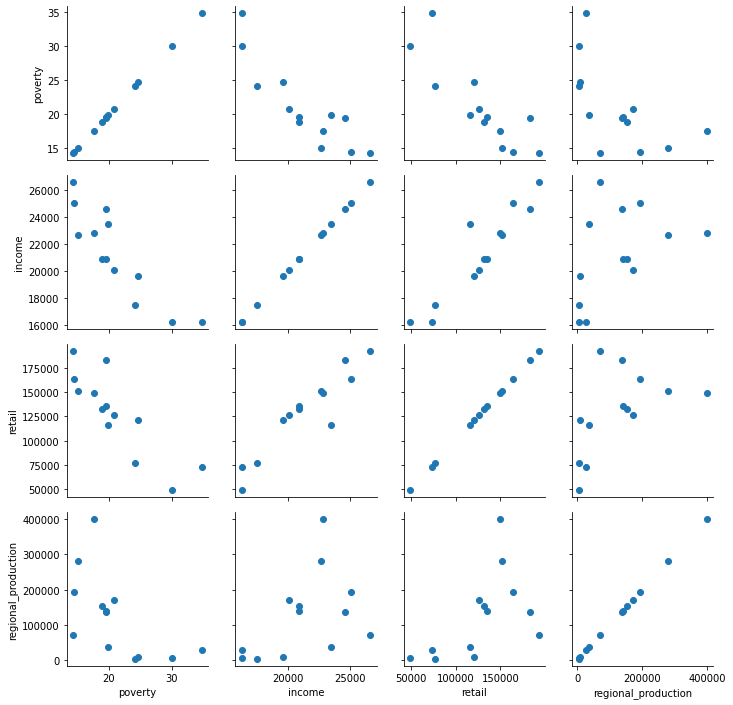

In [63]:
mpg_mod = cluster_with_product[["poverty", "income","retail", "regional_production"]]
pg = sns.PairGrid(mpg_mod)
pg.map(plt.scatter)

**Третья гипотеза частично оправдалась.** Действительно от **уровня бедности (процент населения, живущий за чертой бедности) зависит потребление в регионах. Чем выше процент, тем ниже показатель розничной торговли. Чем выше доход, тем выше потребление.** А вот региональное производство частично зависит от показателей процента бедности и дохода населения. 

## Рассмотрим детальнее третий кластер и определим самые неблагополучные регионы. ##

Начнем с показателя **"Доход населения"** 

<AxesSubplot:title={'center':'Income wages'}, xlabel='Регион'>

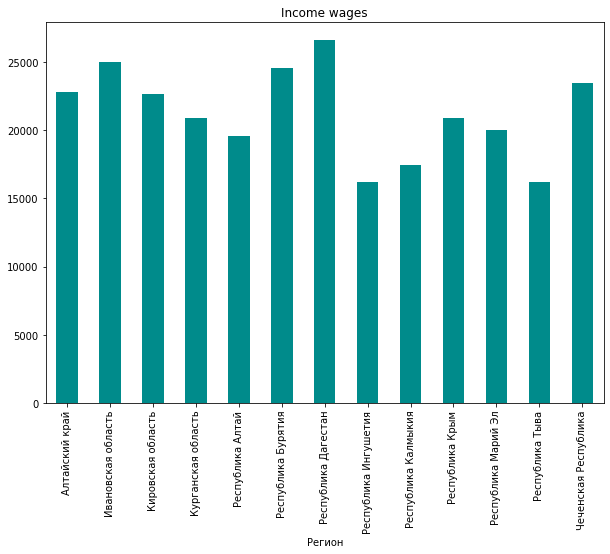

In [64]:
cluster_1["income"].plot(kind='bar', figsize=(10, 7), color='darkcyan', title='Income wages')

С низким показателем доходов населения оказались следующие регионы: 
  * **Республика Тыва** 
  * **Республика Ингушетия**
  * **Республика Калмыкия**  

Посмотрим на **процент населения, живущих за чертой бедности:**

<AxesSubplot:title={'center':'Percent poverty'}, xlabel='Регион'>

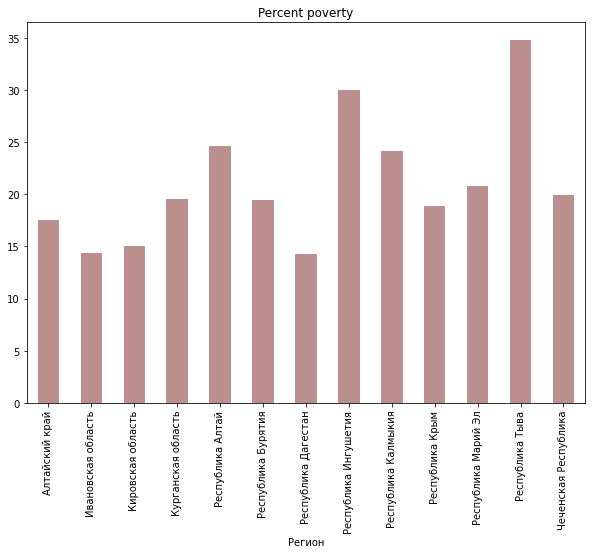

In [65]:
cluster_1["poverty"].plot(kind='bar', figsize=(10, 7), color='rosybrown', title='Percent poverty')

Высокий уровень населения, живущих за чертой бедности, оказался у следующих регионов: 
  * **Республика Тыва** 
  * **Республика Ингушетия**
  * **Республика Калмыкия**
  * **Республика Алтай** 

Следующая диаграмма покажет **уровень смертности детей до года в городском поселении:**

<AxesSubplot:title={'center':'Percent child mortality - Urban'}, xlabel='Регион'>

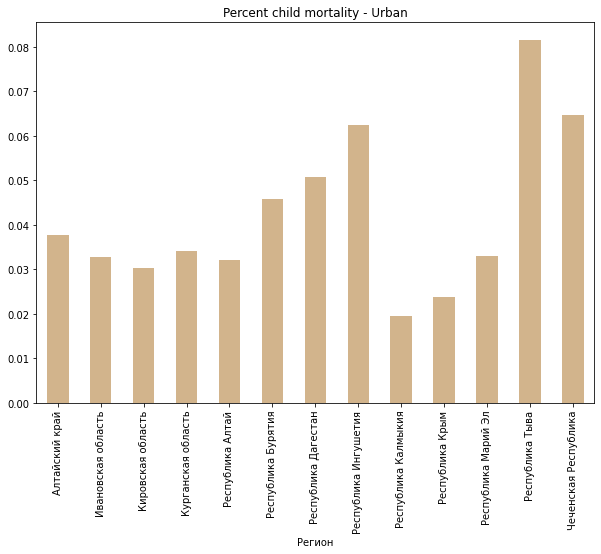

In [66]:
cluster_1["child_mort_urban"].plot(kind='bar', figsize=(10, 7), color='tan', title='Percent child mortality - Urban')

Высокий процент детских смертей прослеживается у следующих регионов: 
  * **Республика Тыва** 
  * **Республика Ингушетия**
  * **Чеченская Республика**

**Численность** населения регионов, входящих в третий кластер 

<AxesSubplot:title={'center':'Population'}, ylabel='population'>

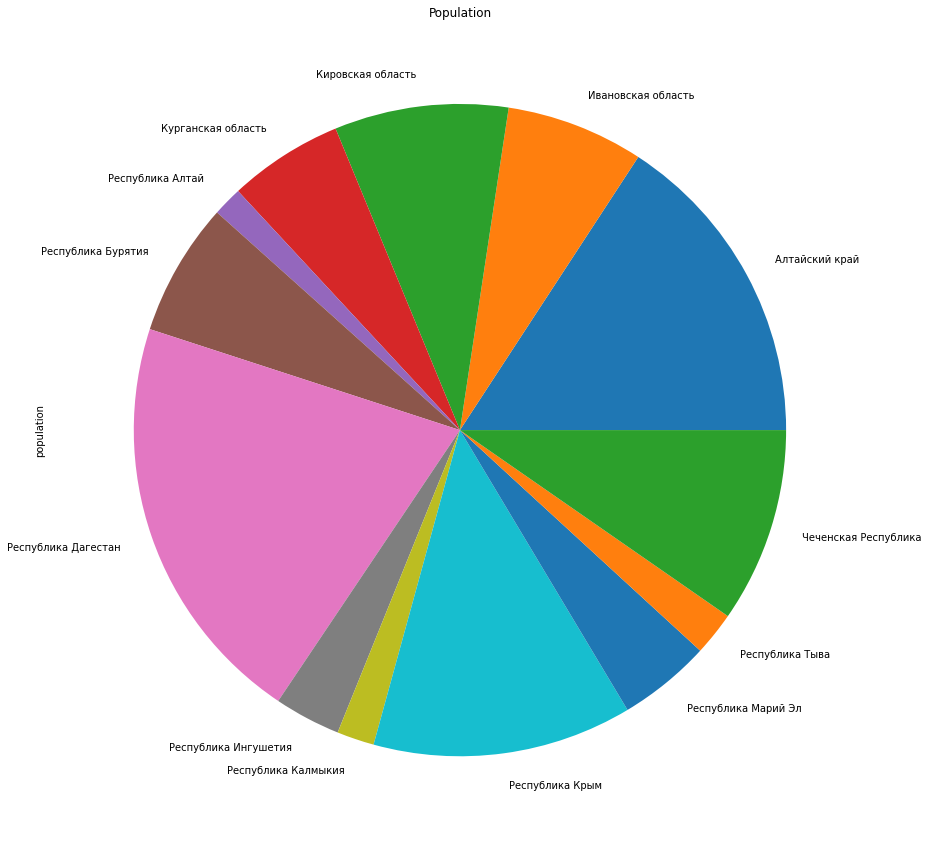

In [67]:
cluster_1["population"].plot.pie(figsize=(15,15), title='Population')

Видим, что самые густонаселенные регионы, это: 
  * **Республика Дагестан** 
  * **Алтайский край**
  * **Республика Крым**  
Возможно смертность детей в регионах Дагестан и Чеченская Республика обусловлена тем, что в данных регионах высокая численность населения.

# Выводы #

В ходе анализа, были взяты **14 признаков и 66 регионов.** Далее регионы были разбиты **на 6 кластеров**, в котором была обнаружена группа уязвимого населения. В нее вошли следующие регионы:

In [68]:
cluster_1.index

Index(['Алтайский край', 'Ивановская область', 'Кировская область',
       'Курганская область', 'Республика Алтай', 'Республика Бурятия',
       'Республика Дагестан', 'Республика Ингушетия', 'Республика Калмыкия',
       'Республика Крым', 'Республика Марий Эл', 'Республика Тыва',
       'Чеченская Республика'],
      dtype='object', name='Регион')

Была установлена **корреляция** между доходами населения, ВВП, детской смертностью, розничной торговлей и соцпомощью. 

В первую очередь нужно обратить внимания на следующие регионы: 
  * **Республика Тыва** 
  * **Республика Ингушетия**
  * **Республика Калмыкия**  
т.к. они показали плохие результаты. 